In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
import string
import re
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.cluster.hierarchy as sch
from IPython.display import Image

## Data Cleaning

The dataset of research papers is provided to you as a .csv file and starter Python code is
provided to you that cleans the data by removing duplicate papers, making the text
contents easier to mine by adjusting formatting, and extracting useful fields from the
larger dataset such as authors, abstracts, date of publication and more. You may choose to
use this starter code and clean data that it produces, or if your chosen algorithm requires a
different format of data or approach, you are free to modify and/or write you own data
cleaning pipeline.

In [2]:
# load the meta data from the CSV file 
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time'])
print (df.shape)

#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")

#drop NANs 
df=df.dropna()

# convert abstracts to lowercase
df["abstract"] = df["abstract"].str.lower()

#show 10 lines of the new dataframe
print (df.shape)
df.head()

(45774, 5)
(34809, 5)


,title,doi,abstract,publish_time,authors
0,SIANN: Strain Identification by Alignment to N...,10.1101/001727,next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...
1,Spatial epidemiology of networked metapopulati...,10.1101/003889,an emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li
2,Sequencing of the human IG light chain loci fr...,10.1101/006866,germline variation at immunoglobulin gene (ig)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...
3,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol
4,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen


In [3]:
pd.set_option('display.max_colwidth', 2000)
#pd.set_option('display.width', 1000)
df['abstract'].head()

0                                                                                                                                                                                                                                                                                                                                                                                        next-generation sequencing is increasingly being used to study samples composed of mixtures of organisms, such as in clinical applications where the presence of a pathogen at very low abundance may be highly important. we present an analytical method (siann: strain identification by alignment to near neighbors) specifically designed to rapidly detect a set of target organisms in mixed samples that achieves a high degree of species- and strain-specificity by aligning short sequence reads to the genomes of near neighbor organisms, as well as that of the target. empirical benchmarking alongside the current state-of-the

In [4]:
# Further cleaning the data to make the algorithm work more efficent later
def data_clean(txt):
    
    #Remove URL
    pattern2=re.compile(r'http\S+')
    txt=re.sub(pattern2,'',txt)    
    pattern2_2 =re.compile(r'www\.\w+\S+')
    txt=re.sub(pattern2_2,'',txt)
    
    #Remove punctuation
    txt=''.join(word for word in txt if word not in string.punctuation)
    
    #remove stopwords
    txt_token=re.split('\W+',txt)
    txt=' '.join(word for word in txt_token if word not in stopwords.words('english'))

    return txt

In [5]:
# Apply the new cleaning function 
df['clean']=df['abstract'].apply(data_clean)
df['clean']

0                                                                                                                                                                                                                                                                                                                                                                      nextgeneration sequencing increasingly used study samples composed mixtures organisms clinical applications presence pathogen low abundance may highly important present analytical method siann strain identification alignment near neighbors specifically designed rapidly detect set target organisms mixed samples achieves high degree species strainspecificity aligning short sequence reads genomes near neighbor organisms well target empirical benchmarking alongside current stateoftheart methods shows extremely high positive predictive value even low abundances target organism mixed sample siann available illumina basespace app well signa

## Data Visualization and Exploratory Data Analysis

Depending on your overarching theme and questions that you wish to address about
COVID-19 present 3 graphical figures that visualize aspects or information in the data
that you will further explore with your models. How could these trends be used to help
with the task of methodically extracting all information and trends of this type? Consider
how accessing the data and creating these visualizations will inform how the data will
need to be pre-processed and fed into your models. All graphs should be readable and
presented in the notebook. All axes must be appropriately labeled. In addition to data
visualizations, perform exploratory data analysis in other forms, if necessary.

**Check infectious diseases overall.**

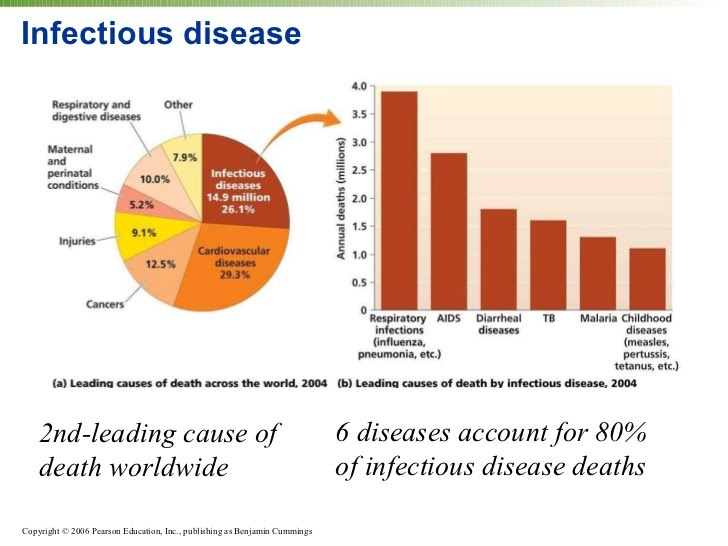

In [6]:
Image(filename='infection_disease.jpg')

**From the statistics, infectious disease is the 2nd leading cause of death worldwide since 2004. On top of that, respiratory diseases due to infectious diseases account the largest portion of it. Covid-19 is apparently one of them. As a result, people are dying recently due to this novel virus. That is why scientists are working hard to find solution to stop its spreading. The purpose of this project is assisting to accomplish the target above by cutting off any possible linkage or contacts between human and the virus.** 

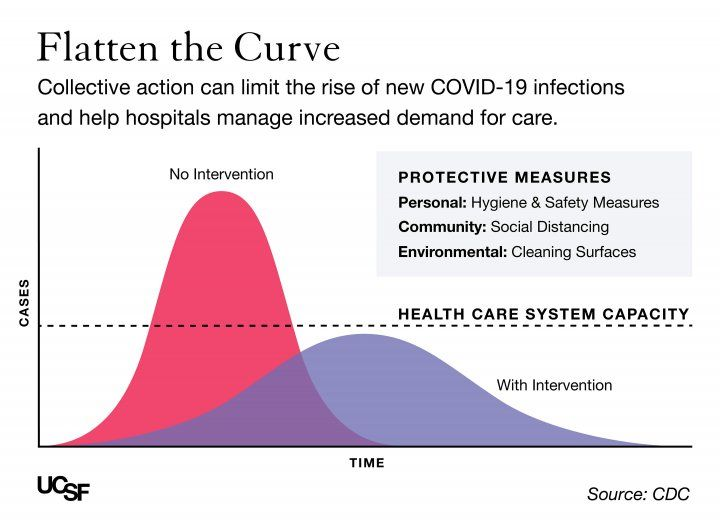

In [19]:
Image(filename='flattening-the-curve.jpg')

**According to the figure above from CDC, it is clearly shown that the healthcare system can be sustained to take care of those infected patients as long as the spread of infections have been contained under the health care system capacity. Therefore, all the possible ways of preventing coronavirus will be highlighted in this project. Thus, finding all the probable transmission modes of covid-19 will be helpful in determining how to control this outbreak. As a result, a guideline of all transmission modes of different infectious diseases is shown in the figure below.** 

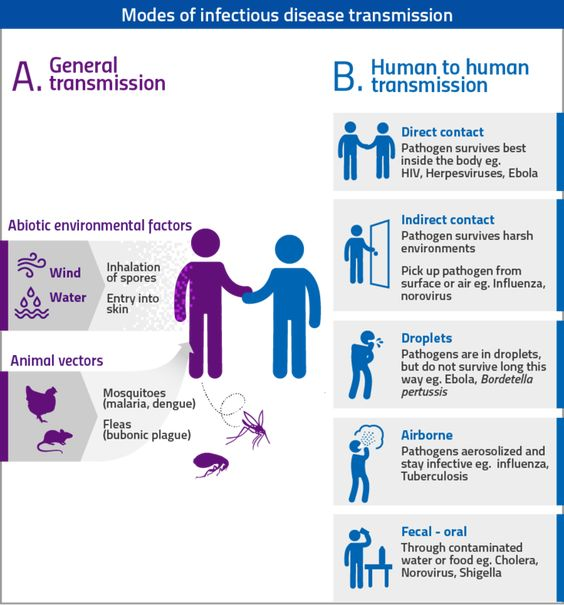

In [7]:
Image(filename='transmission_modes.jpg')

**As shown from the figure above, all types of transmission modes among infectious virus will be used as reference so that specific types related to coronavirus will be clustered with unsupervised learning algorithm. Then the resources in the society can be allocated accordingly and efficiently.** 

In [8]:
df_covid19=df[df['clean'].str.contains('covid19|coronavirus',regex=True,case=False)]
print('There are about {} literature specifically regarding of covid-19.'.format(df_covid19.shape[0]))


There are about 7348 literature specifically regarding of covid-19.


**Based on the existing scientific reports regarding of coronavirus, several transmission modes have been confirmed from all over the world with evidence. However, not all types of possible transmission modes have been discovered yet due to the lack of pertinent evidence or cases confirmed. Not happening yet does not mean that it does not remain at all. Therefore, precautions need to be taken for all the possible transmission methods related because what people don't realize yet are the most dangerous factors. As a result, the entire dataset including different infectious diseases will be used to find out all the possible transmission modes especially for those that people do not know yet.** 

In [9]:
#Define the list of transmission mode

# Direct contact
direct_contact=[('direct contact'),('skin skin'), ('kiss'), ('sexually transmitted'), ('placenta'), ('soil'),('vegetation')]
droplet_spread=[('droplet'),('cough'),('sneez')]
direct=direct_contact+droplet_spread

# Indirect contact
airborne=[('airborne'),('air'),('dust')]
vehicles=[('vehicle|vehicleborne'),('contaminated'),('food|foodborne|water'),('biologic product|blood|surgical'),('fomite|handkerchief|bedding|doorknob')]
vector=[('vector'),('mosquito|flea|tick'),('animals? person|animals? human|animals? people'), ('animal animal'), ('insect bites'),('zoonosis|zoonotic')]
fecal_oral=[('fecal oral'),('feces')]
indirect=airborne+vehicles+vector+fecal_oral
                                          
# Total modes
total=direct+indirect       

{'direct contact': 98, 'skin skin': 1, 'kiss': 14, 'sexually transmitted': 50, 'placenta': 99, 'soil': 67, 'vegetation': 7, 'droplet': 228, 'cough': 555, 'sneez': 58, 'airborne': 301, 'air': 4398, 'dust': 982, 'vehicle|vehicleborne': 155, 'contaminated': 226, 'food|foodborne|water': 1306, 'biologic product|blood|surgical': 2230, 'fomite|handkerchief|bedding|doorknob': 85, 'vector': 1245, 'mosquito|flea|tick': 485, 'animals? person|animals? human|animals? people': 273, 'animal animal': 2, 'insect bites': 2, 'zoonosis|zoonotic': 1024, 'fecal oral': 12, 'feces': 281}


C:\Users\qg010\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


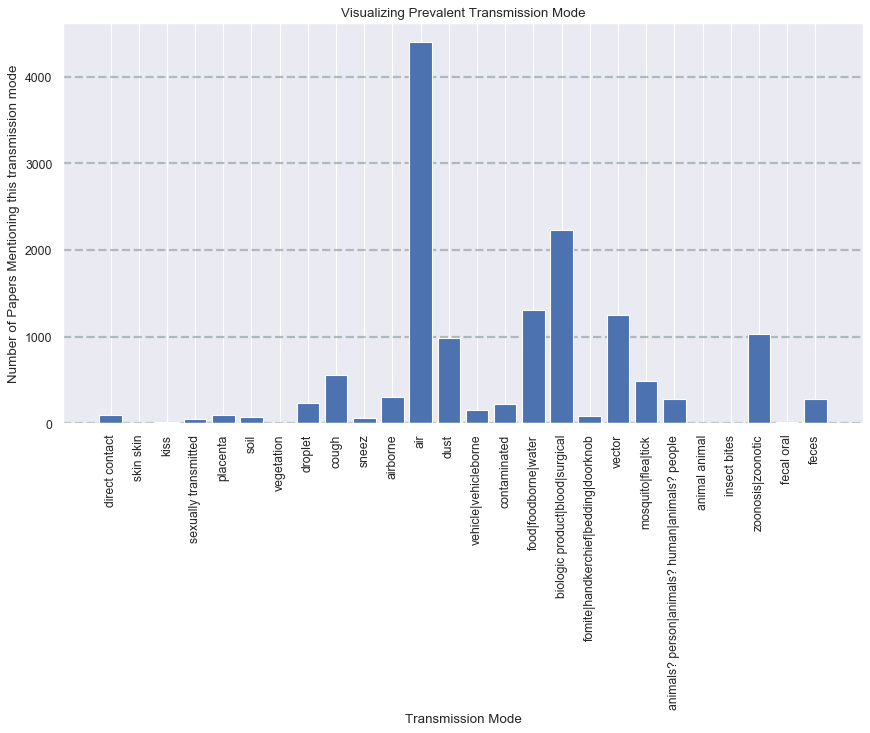

In [10]:
#Lets do some preliminary exploratory data analysis

transmission_count = dict((transmission,0) for transmission in total)

#print(transmission_count)

for transmission in transmission_count:
    for abstract in df['clean']:
        pattern=re.compile(transmission)
        if len(re.findall(pattern,abstract))!=0:
            transmission_count[transmission] += 1


print(transmission_count)

#loc = np.arange(len(transmission_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(transmission_count.keys(),transmission_count.values())
#ax.set_xticks(loc, tuple(total),rotation = 90)
ax.set_xticklabels(total, rotation = 90)

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this transmission mode')
ax.set_xlabel('Transmission Mode')
ax.set_title('Visualizing Prevalent Transmission Mode')
plt.show()

In [11]:
# create more readable labels
label={
    'skin skin':'skin to skin',
    'vehicle|vehicleborne':'vehicleborne',
    'sneez':'sneezing',
    'food|foodborne|water':'food or water',
    'biologic product|blood|surgical':'biologic product(blood)',
    'fomite|handkerchief|bedding|doorknob':'fomite',
    'mosquito|flea|tick':'mosquito/flea/tick',
    'animals? person|animals? human|animals? people':'animal to human',
    'animal animal':'animal to animal',
    'zoonosis|zoonotic':'zoonosis',
    'fecal oral':'fecal-oral'  
}

The transmission modes that have been removed are listed here:['skin skin', 'kiss', 'vegetation', 'animal animal', 'insect bites', 'fecal oral']
The updated dictionary is {'direct contact': 98, 'sexually transmitted': 50, 'placenta': 99, 'soil': 67, 'droplet': 228, 'cough': 555, 'sneez': 58, 'airborne': 301, 'air': 4398, 'dust': 982, 'vehicle|vehicleborne': 155, 'contaminated': 226, 'food|foodborne|water': 1306, 'biologic product|blood|surgical': 2230, 'fomite|handkerchief|bedding|doorknob': 85, 'vector': 1245, 'mosquito|flea|tick': 485, 'animals? person|animals? human|animals? people': 273, 'zoonosis|zoonotic': 1024, 'feces': 281}.


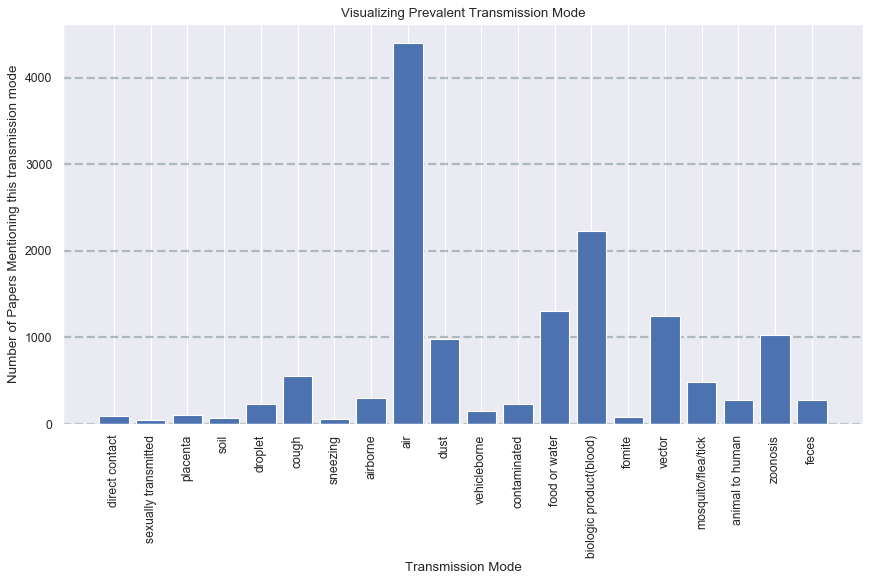

In [12]:
# Remove transmission modes that have been mentioned less frequently (less than 50)
less=[]
for mode,count in transmission_count.items():
    if count<50:
        less.append(mode)
total_update=[mode for mode in total if mode not in less]
col_label=list(pd.Series(total_update).replace(label))

# Update dictionary as well after removing certain transmission modes
print('The transmission modes that have been removed are listed here:{}'.format(less))
for key in less:
    if key in transmission_count:
        del transmission_count[key]

# Re-plot bar chart
width = 0.35
print('The updated dictionary is {}.'.format(transmission_count))
fig = plt.figure(num=None, constrained_layout=True, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(transmission_count.keys(),transmission_count.values())
#ax.set_xticks(loc, tuple(total),rotation = 90)
ax.set_xticklabels(col_label, rotation = 90)

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this transmission mode')
ax.set_xlabel('Transmission Mode')
ax.set_title('Visualizing Prevalent Transmission Mode')
plt.show()

**From the graph above, it is demonstrated that the prevailing transmission modes mentioned in the literature. Clearly, these infectious diseases have to do the spread in the air since there are many reports containing the similar topics. However, whether it is indeed related to covid-19 transmission modes as well, clustering algorithm will be helpful to address to that question as shown in the next section.**

## Model selection and fitting to data

Select a machine learning model of your choice (you may select an unsupervised or
supervised machine learning model depending on your approach) that will allow you to
study some aspect of COVID-19 from the corpus of research articles. You must justify
your algorithm choices and the approach you will use to fit your model using the dataset
provided. You may also choose to study multiple models and report on the suitability of
each in addressing your overarching question regarding COVID-19. You should also use
the dataset provided to train the models selected and discuss and interpret the findings of
these models. You may also use this section to improve the model depending on the
findings of your models and how you interpret them.

**In this project, hierarchical clustering will be used to group transmission modes that prevalent for different infectious diseases. Because each infectious disease may prevail in different transmission modes. Since only a few transmission modes have been discovered for covid-19, other possible transmission methods within the same cluster need to be identified as well. Therefore, hierarchical clustering as an excellent candidate unsupervised machine learning algorithm for different transmission modes from literature will be examined.** 

**To more specific, the number of cooccurrence in single literature for two different transmission modes will be used to calculate distance. The more frequent two transmission modes appear together, the closer these two modes are. Thus, many different transmission modes can be found in addition to the ones that everyone has already known.**

### Define matrix distance

In [13]:
#Define the metric that will be used to define the "distance" metric used in the heirarchical clustering algorithm
transmission_dist = np.zeros((len(total_update),len(total_update)), dtype=float)
#print(transmission_dist)

# Create transmission DataFrame to easily manipulate late
df_transmission = pd.DataFrame(transmission_dist, columns=total_update, index=total_update)
df_transmission

,direct contact,sexually transmitted,placenta,soil,droplet,cough,sneez,airborne,air,dust,vehicle|vehicleborne,contaminated,food|foodborne|water,biologic product|blood|surgical,fomite|handkerchief|bedding|doorknob,vector,mosquito|flea|tick,animals? person|animals? human|animals? people,zoonosis|zoonotic,feces
direct contact,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sexually transmitted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
placenta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
soil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
droplet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cough,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sneez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airborne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Helper function that will calculate the distance

def cumulative_dist(transmission1, transmission2, df):
    cum_sum = 0
    number_of_papers = 0
    if transmission1 == transmission2: return 0
    
    pattern1=re.compile(transmission1)
    pattern2=re.compile(transmission2)
    
    for abstract in df['clean']:
        if ((len(re.findall(pattern1,abstract))!=0) and (len(re.findall(pattern2,abstract))!=0)):
            number_of_papers += 1
            cum_sum -= 1
        elif (((len(re.findall(pattern1,abstract))!=0) and (len(re.findall(pattern2,abstract))==0)) or ((len(re.findall(pattern1,abstract))==0) and (len(re.findall(pattern2,abstract))!=0))):
            number_of_papers += 1
            cum_sum += 1

    return cum_sum/number_of_papers


#Populate Matrix of transmission distances by mining the text of the papers found in the database and using the distance rule as

#For a transmission A and B mentioned in a paper together the distanceA_B += 1 
# or distanceA_B -= 1 if they are not mentioned together

transmission_dist = np.zeros((len(total_update),len(total_update)),float)
#print(transmission_dist)
#print()
for i in range(len(total_update)):
    for j in range(len(total_update)):
         transmission_dist[i][j] = cumulative_dist(total_update[i],total_update[j], df)           

In [15]:
# Magnify the distance to make them separable easily and check the result matrix 
i = 0
for transmission in total_update:
    df_transmission[transmission] = np.power(transmission_dist[i],9)
    i += 1

# Change index and column names
df_transmission.rename(columns=label, index=label,inplace=True)
print('Distance matrix is shown as here:')   
df_transmission

Distance matrix is shown as here:


,direct contact,sexually transmitted,placenta,soil,droplet,cough,sneezing,airborne,air,dust,vehicleborne,contaminated,food or water,biologic product(blood),fomite,vector,mosquito/flea/tick,animal to human,zoonosis,feces
direct contact,0.000000,0.884008,0.829829,1.000000,0.488894,0.821034,0.889688,0.591350,0.881749,0.919328,0.803616,0.553043,0.878043,0.882111,0.531614,0.947496,1.000000,0.862475,0.849299,0.823594
sexually transmitted,0.884008,0.000000,1.000000,1.000000,0.936864,0.970590,1.000000,0.949731,0.968031,0.982676,1.000000,0.876030,0.922786,0.976533,0.873418,0.906321,0.934450,1.000000,0.983349,1.000000
placenta,0.829829,1.000000,0.000000,0.896051,0.946121,0.972770,1.000000,1.000000,0.941347,0.951008,0.931062,1.000000,0.987252,0.854467,1.000000,0.960445,0.827937,0.952516,0.968340,0.953497
soil,1.000000,1.000000,0.896051,0.000000,1.000000,0.971385,0.863860,0.861419,0.944787,0.885378,1.000000,0.554715,0.607620,0.976705,1.000000,0.946282,0.936418,0.850713,0.967424,0.853936
droplet,0.488894,0.936864,0.946121,1.000000,0.000000,0.390548,0.376174,0.069964,0.682966,0.913793,0.953854,0.460428,0.776182,0.848702,0.442246,0.917263,0.902913,0.930126,0.903230,0.931194
cough,0.821034,0.970590,0.972770,0.971385,0.390548,0.000000,0.220442,0.585780,0.614710,0.909668,0.974897,0.954725,0.688841,0.590405,0.841996,0.980155,0.949116,0.957251,0.890956,0.877156
sneezing,0.889688,1.000000,1.000000,0.863860,0.376174,0.220442,0.000000,0.657112,0.929319,0.965848,1.000000,0.938164,0.862824,0.968914,0.674203,1.000000,0.967276,1.000000,0.983471,0.947989
airborne,0.591350,0.949731,1.000000,0.861419,0.069964,0.585780,0.657112,0.000000,0.265851,0.842341,0.784069,0.580756,0.705318,0.809702,0.580351,0.921045,0.955008,0.798507,0.921037,0.969442
air,0.881749,0.968031,0.941347,0.944787,0.682966,0.614710,0.929319,0.265851,0.000000,0.585430,0.883159,0.799782,0.523994,0.375479,0.885068,0.656536,0.778747,0.893008,0.661486,0.868786
dust,0.919328,0.982676,0.951008,0.885378,0.913793,0.909668,0.965848,0.842341,0.585430,0.000000,0.865217,0.734732,0.394765,0.776050,0.934271,0.696587,0.883029,0.877249,0.764918,0.711613


### Hierarchical Clustering

In [16]:
#Magnify the distance prior to HCA
distance = np.power(transmission_dist,9)  

#distance
Y = sch.linkage(distance, method='centroid')

C:\Users\qg010\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 Transmission Modes Clusters')

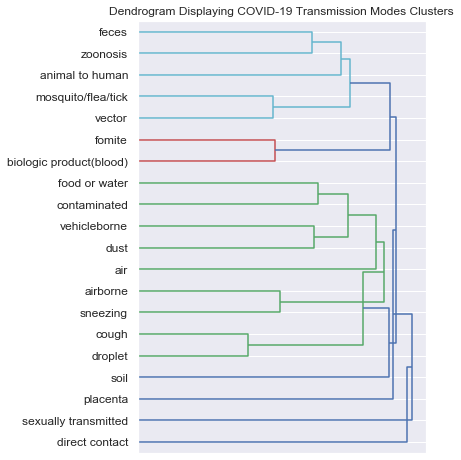

In [17]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get dendrograms
Z1 = sch.dendrogram(Y, orientation='right',color_threshold=1.2) # ,count_sort='ascending',labels=col_label

ax1.set_xticks([])
ax1.set_yticklabels(col_label)
ax1.set_title("Dendrogram Displaying COVID-19 Transmission Modes Clusters")

**From hierarchical clustering, it is shown that those known transmission modes of covid-19 such as droplet in the air is within the cluster including contaminated food or water, dust, and other vehicle surfaces. Fomite and biologic product are popular transmission modes for virus such HIV. Zoonosis and disease transmitting from animal to human are grouped together for another virus. These are concluded based on the current scientific reports. They may be update when newer reports are published.** 

## Deriving insights about policy and guidance to tackle the outbreak based on model findings

Using the findings from your NLP model and text mining 35,000 unique biomedical
research papers on the coronavirus you are now tasked with discussing and proposing
how scientists, doctors, nurses, healthcare professionals, industry and governments can
best use the insights from your data science model to assist in the fight against the
COVID-19 pandemic. Use the insights derived about the disease from your model and
your data analysis to justify proposed policies or action items.

**Checking the transmission modes below that have been realized so far in the public.** 

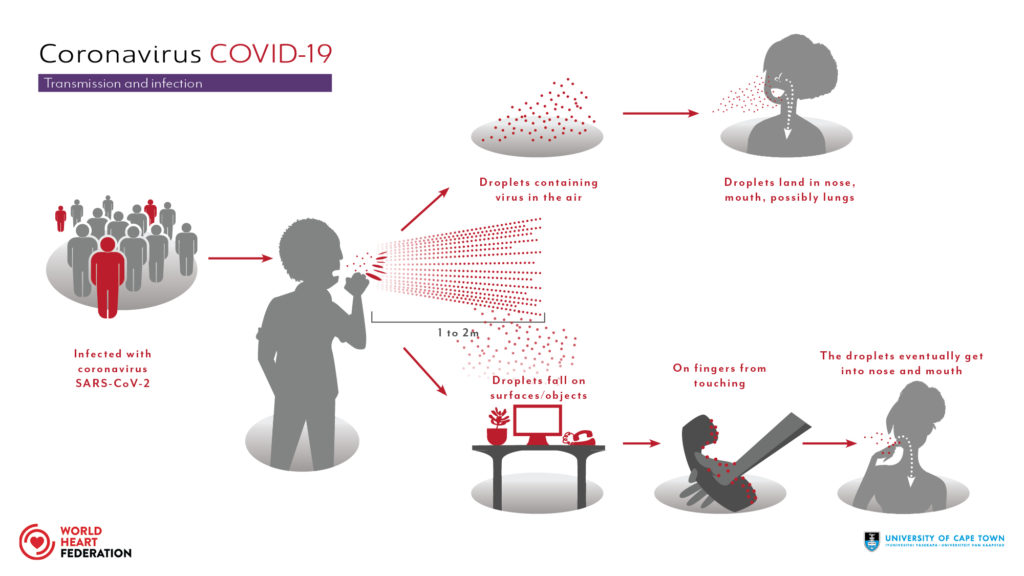

In [18]:
Image(filename='Coronavirus-transmission.jpg')

**According to the clustering before, other than those transmission modes that people have already realized including droplets in the air due to people's coughing, sneezing etc., some other possible transmission modes appear within the same cluster such as contaminated food or water, virus attached in the dust or any other surfaces. <br><br>
Based on the results obtained, scientists need to continue searching proof that other transmission modes may also be  detrimental to public health and convincing as well as alerting public with scientific evidence. Doctors, nurses, and all healthcare professionals need to take extra precautions dealing with patients being tested positively by wearing qualified equipment and sterilizing themselves well while isolating patients into areas away from others. Meanwhile, different industries should also keep distance between employees by working remotely. Government has to play an important role in regulating civilian's behavior by forcing citizens to keep social distance along with shutting down the places where many people could gather. Meanwhile, government need to work with medias to distribute the latest and correct information on how to protect themselves. From the results gained from the model, daily supplies like food and water are also needed to be monitored with regulation associated with it. Only by doing these, all the possible ways that covid-19 could probably infect human will be terminated. In another words, coronavirus is not accessible to human anymore as long as all the transmission modes mentioned have been blocked away from people.  <br><br> 
Since the spread of diseases is not finished yet, more scientific literature will be published. This model can be used again to detect any other possible undiscovered transmission mode. Overall, this is a war without smoke of gunpowder that requires everyone fighting together to stop dissemination of coronavirus. Currently, the identified and possible transmission methods have been shown here. All humankind should avoid any direct and indirect mentioned earlier, by doing so, this virus will be defeated.**

